# USD-MNT Exchange Rate Forecast Follow Up

The purpose of this notebook is to follow up on the December 2018 article I wrote using machine learning to forecast USD-MNT exchange rates. 

The previous forecast has been saved as a CSV file names 'forecast.csv'. The entire timeseries of USD-MNT exchange rates is saved as 'USD-MNT.csv'.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

plt.style.use('../../mds.mplstyle')

In [49]:
usd = pd.read_csv('USD-MNT.csv', parse_dates=['Date'], index_col='Date', thousands=',')
forecast = pd.read_csv('../Part 2 - Machine Learning Model/forecast.csv', parse_dates=['variable'], index_col='variable', thousands=',')

In [50]:
usd.head()

,USD
Date,
2008-01-02,1169.97
2008-01-03,1169.97
2008-01-04,1169.97
2008-01-07,1169.81
2008-01-08,1170.11


In [51]:
forecast.head()

,value
variable,
2018-09-30,2429.98600
2018-12-31,2420.26575
2019-06-30,2496.68010


It turns out we have some NaN values. Let's drop them and then visualize the forecast. 

In [52]:
nan = lambda usd: usd[usd.isnull().any(axis=1)]

In [53]:
nan(usd)

,USD
Date,
2019-01-12,NaN
2019-01-13,NaN
2019-02-03,NaN


In [54]:
usd = usd.dropna()

In [55]:
usd.shape

(3842, 1)

In [56]:
usd.index[-365:]

DatetimeIndex(['2018-06-30', '2018-07-01', '2018-07-02', '2018-07-03',
               '2018-07-04', '2018-07-05', '2018-07-06', '2018-07-07',
               '2018-07-08', '2018-07-09',
               ...
               '2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30',
               '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
               '2019-07-05', '2019-07-06'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [57]:
usd['USD'][-365:]

Date
2018-06-30    2462.82
2018-07-01    2462.82
2018-07-02    2462.78
2018-07-03    2462.84
2018-07-04    2463.15
2018-07-05    2463.46
2018-07-06    2463.31
2018-07-07    2463.31
2018-07-08    2463.31
2018-07-09    2463.20
2018-07-10    2461.66
2018-07-11    2461.66
2018-07-12    2461.66
2018-07-13    2461.66
2018-07-14    2461.66
2018-07-15    2461.66
2018-07-16    2461.60
2018-07-17    2461.17
2018-07-18    2461.20
2018-07-19    2461.28
2018-07-20    2461.66
2018-07-21    2461.66
2018-07-22    2461.66
2018-07-23    2463.24
2018-07-24    2463.02
2018-07-25    2464.84
2018-07-26    2464.05
2018-07-27    2464.44
2018-07-28    2464.44
2018-07-29    2464.44
               ...   
2019-06-07    2652.13
2019-06-08    2652.13
2019-06-09    2652.13
2019-06-10    2651.87
2019-06-11    2652.43
2019-06-12    2653.14
2019-06-13    2653.87
2019-06-14    2654.41
2019-06-15    2654.41
2019-06-16    2654.41
2019-06-17    2655.19
2019-06-18    2656.05
2019-06-19    2656.10
2019-06-20    2656.18
2019-

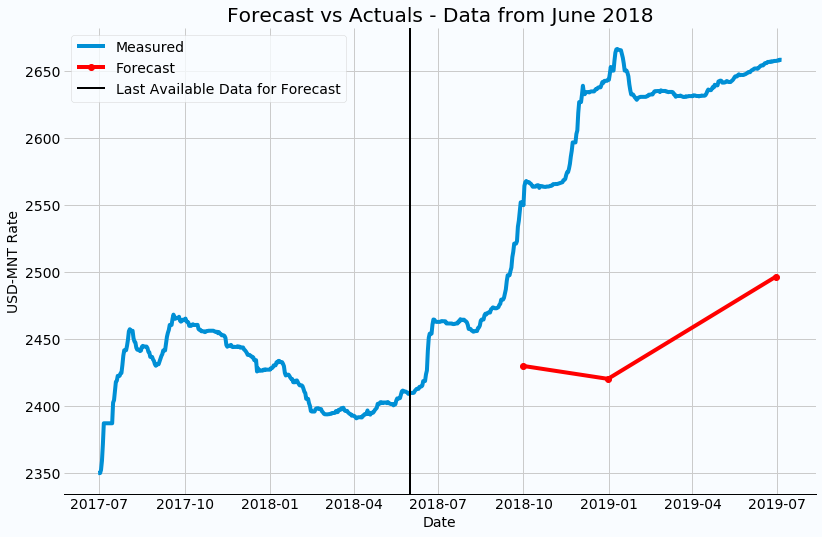

In [82]:
fig, ax = plt.subplots()
ax.plot(usd.index[-730:], usd['USD'][-730:])
ax.plot(forecast.index, forecast['value'], color='red',marker='o')
ax.axvline(x='2018-06', color='black', linewidth=2)
ax.set_xlabel('Date')
ax.set_ylabel('USD-MNT Rate')
ax.set_title("Forecast vs Actuals - Data from June 2018")
ax.legend(labels=['Measured', 'Forecast', 'Last Available Data for Forecast'])

In reviewing the forecast and the measured